In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
signal_data = np.cos(np.arange(1600)* (20*np.pi/1000))

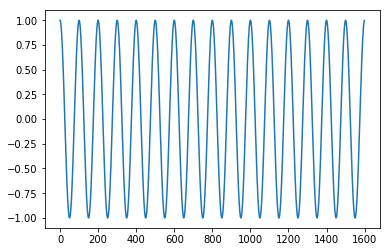

In [20]:
plot_x = np.arange(1600)
plt.plot(plot_x, signal_data)

In [22]:
signal_data[1: 1+5]

array([0.99802673, 0.9921147 , 0.98228725, 0.96858316, 0.95105652])

In [35]:
def create_dataset(signal_data, look_back=1):
    dataX, dataY = [],[]
    for i in range(len(signal_data) - look_back):
        dataX.append(signal_data[i: (i+look_back), 0])
        dataY.append(signal_data[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

In [36]:
signal_data.shape

(1600, 1)

In [37]:
from sklearn.preprocessing import MinMaxScaler

look_back = 40

scaler = MinMaxScaler(feature_range=(0,1))
signal_data = scaler.fit_transform(signal_data)

train = signal_data[:800]
valid = signal_data[800:1200]
test = signal_data[1200:]

x_train, y_train = create_dataset(train, look_back)
x_valid, y_valid = create_dataset(valid, look_back)
x_test, y_test = create_dataset(test, look_back)

In [43]:
from keras import *
from keras.layers import *

In [42]:
model = Sequential()
model.add(layers.Dense(32, input_dim=40, activation='relu'))
model.add(layers.Dropout(0.3))
for i in range(2):
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dropout(0.3))
model.add(layers.Dense(1))

In [44]:
model = Sequential()
model.add(LSTM(32, input_shape=(None, 1)))
model.add(Dropout(0.3))
model.add(Dense(1))

In [45]:
model = Sequential()
model.add(LSTM(32, batch_input_shape=(1,look_back,1), stateful=True))
model.add(Dropout(0.3))
model.add(Dense(1))